## Notebook 4 - Evaluating our GOES cloud thresholding

To test how well the thresholding is working from GOES radiances/brightnesses, let's pull the pixel for Kettle Ponds and compare to observed radiative fluxes for the SAIL/SPLASH/SoS site.

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

#### Load in in situ obs and processed GOES RGB composite

In [2]:
date = '20230605'

# In situ obs load
obs_path = '/storage/cdalden/goes/surface_obs/'
obs_file = f'isfs_sos_qc_geo_tiltcor_5min_v2_{date}.nc'

obs = xr.open_dataset(obs_path + obs_file)

# GOES data load
goes_path = '/storage/cdalden/goes/goes16/rgb_composite/'
goes_file = f'goes16_C02_C05_C13_RGB_colorado_{date}.nc'

# Use f-string to dynamically name the dataset
goes_ds_name = f'goes_{date}'
globals()[goes_ds_name] = xr.open_dataset(goes_path + goes_file)

# Access the dataset
goes_20230605


<xarray.Dataset> Size: 9GB
Dimensions:    (t: 288, y: 640, x: 966)
Coordinates:
  * t          (t) datetime64[ns] 2kB 2023-06-05T00:02:36.606086016 ... 2023-...
    x_image    float32 4B ...
    y_image    float32 4B ...
  * y          (y) float64 5kB 41.53 41.52 41.51 41.51 ... 37.02 37.01 37.01
  * x          (x) float64 8kB -112.1 -112.1 -112.1 ... -104.0 -104.0 -104.0
Data variables:
    refl_C02   (t, y, x) float64 1GB ...
    refl_C05   (t, y, x) float64 1GB ...
    btemp_C13  (t, y, x) float64 1GB ...
    green      (t, y, x) float64 1GB ...
    blue       (t, y, x) float64 1GB ...
    red        (t, y, x) float64 1GB ...

In [3]:
from netCDF4 import Dataset
try:
    ds = Dataset('/storage/cdalden/goes/surface_obs/sos_ds_5min_storage_with_tsurf.nc', 'r')
    print("File opened successfully.")
except Exception as e:
    print(f"Error: {e}")

Error: [Errno -101] NetCDF: HDF error: '/storage/cdalden/goes/surface_obs/sos_ds_5min_storage_with_tsurf.nc'


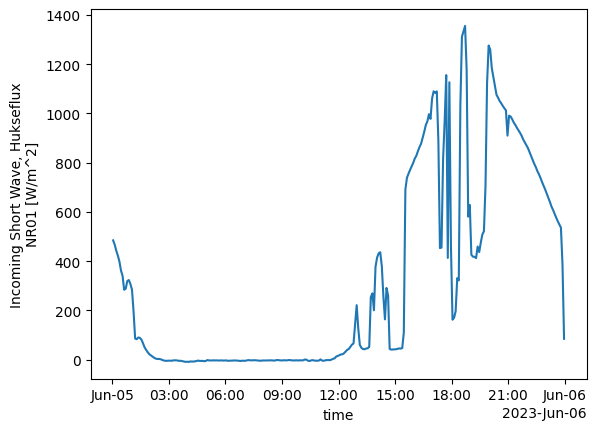

In [4]:
obs['Rsw_in_uw'].plot()

In [11]:
latitude = obs.latitude_uw.values
longitude = obs.longitude_uw.values
goes_crested_butte_pixel = globals()[goes_ds_name].sel(y=latitude, x=longitude, method='nearest')


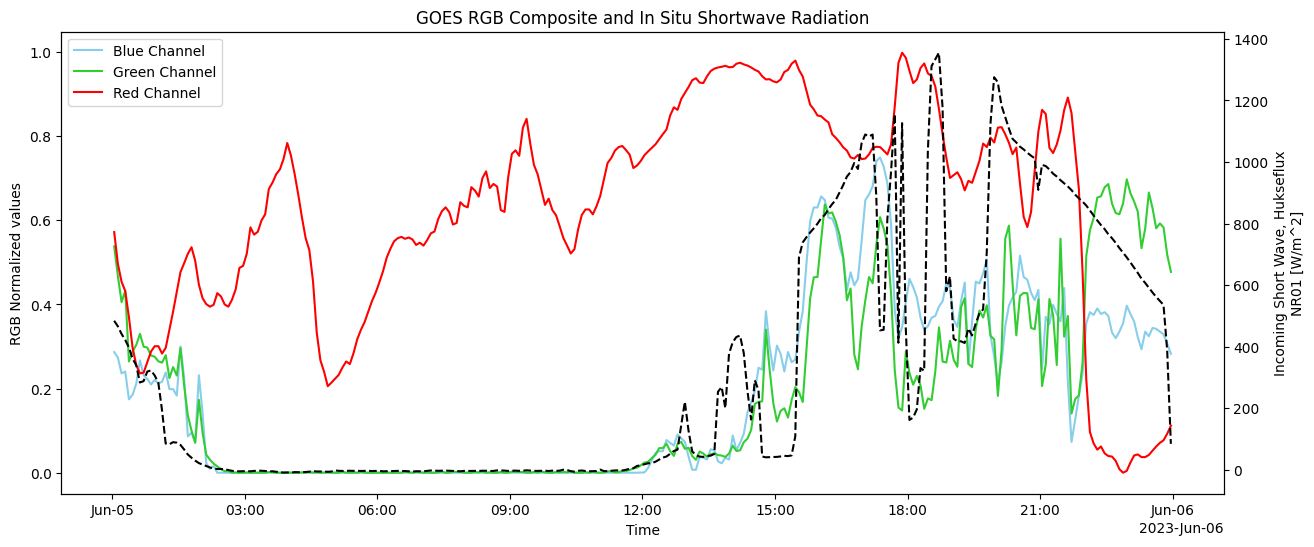

In [13]:
# Plot the GOES data for the specific pixel
fig, ax = plt.subplots(figsize=(15, 6))
goes_crested_butte_pixel['blue'].plot(ax=ax, label='Blue Channel', color='skyblue')
goes_crested_butte_pixel['green'].plot(ax=ax, label='Green Channel', color='limegreen')
goes_crested_butte_pixel['red'].plot(ax=ax, label='Red Channel', color='red')

ax2 = ax.twinx()
obs['Rsw_in_uw'].plot(ax=ax2, 
                             color='black', label='In Situ Shortwave In', ls = '--')


ax.set_xlabel('Time')
ax.set_ylabel('RGB Normalized values')
ax.set_title('GOES RGB Composite and In Situ Shortwave Radiation')
ax.legend()